In [2]:
import pandas as pd
import numpy as np
import mysql.connector
import altair as alt
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
from scipy.stats import ttest_rel
from scipy.stats import shapiro, levene, ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

from sqlalchemy import create_engine
from urllib.parse import quote_plus
from sqlalchemy_utils import create_database, database_exists
from sqlalchemy import MetaData
import pymysql
from sqlalchemy.orm import Session
from sqlalchemy import Table, Column, Integer, BIGINT, String, BigInteger, Boolean, Float, Unicode
from sqlalchemy import ForeignKey, Text
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.dialects.mysql import LONGTEXT
from sqlalchemy import create_engine

In [3]:
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="3901",
    database="lotech",
    auth_plugin='mysql_native_password'
)

In [4]:
query = """
select order_details.order_id,
       order_details.total_price,
       orders.shamsi_date
from order_details
         inner join orders on order_details.order_id = orders.id
"""
mycursor = mydb.cursor()
mycursor.execute(query)
orders = mycursor.fetchall()
df_orders = pd.DataFrame(
    orders,
    columns=['order_id', 'total_price', 'shamsi_date'])

In [5]:
df_orders['month'] = df_orders['shamsi_date'].apply(lambda x: int(x.split('-')[1]))
df_orders

,order_id,total_price,shamsi_date,month
0,1,3450000,1396-10-26,10
1,2,3400000,1394-04-21,4
2,3,44900000,1402-05-24,5
3,4,12550000,1397-06-17,6
4,5,2050000,1392-09-30,9
...,...,...,...,...
1018200,1017077,3800000,1395-11-06,11
1018201,1017078,1300000,1391-04-24,4
1018202,1017079,16700000,1399-05-18,5
1018203,1017080,3750000,1394-02-04,2


In [6]:
monthly_sales = df_orders.groupby('month')['total_price'].sum()
monthly_sales_df = pd.DataFrame({
    'index': monthly_sales.index,
    'value': monthly_sales.values
})
monthly_sales_df.to_csv('6-monthly-sales.csv', index=False)
monthly_sales

month
1     1261795345500
2     1286823997000
3     1261959090500
4     1314044448000
5     1337549254000
6     1419271919000
7     1309230545500
8     1079450326500
9     1073713521000
10    1095087545500
11    1142384242000
12    1131005920500
Name: total_price, dtype: int64

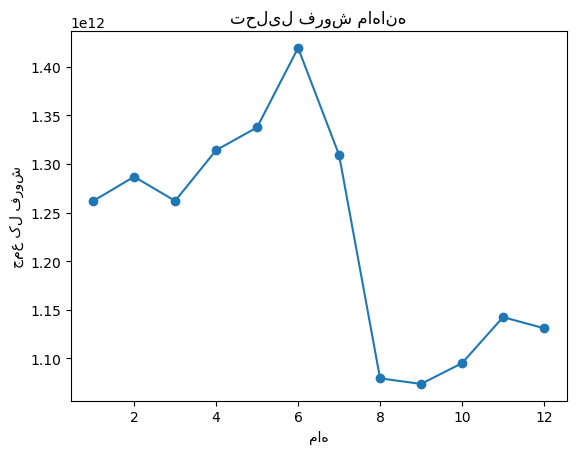

In [20]:
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.xlabel('ماه')
plt.ylabel('جمع کل فروش')
plt.title('تحلیل فروش ماهانه')
plt.show()

In [23]:
# mean sells for every month
monthly_avg_sales = df_orders.groupby('month')['total_price'].mean()

# persent for every month
budget_allocation_percentages = monthly_avg_sales / monthly_avg_sales.sum()

#example
annual_budget = 1000000000 
budget_allocation = (budget_allocation_percentages * annual_budget).round(2)

print("درصدهای تخصیص بودجه به هر ماه:")
print(budget_allocation_percentages)
budget_allocation_percentages_df = pd.DataFrame({
    'index': budget_allocation_percentages.index,
    'value': budget_allocation_percentages.values
})
budget_allocation_percentages_df.to_csv('6-budget-allocation-percentages.csv', index=False)

print("\nبودجه‌های تخصیص یافته به هر ماه:")
print(budget_allocation)

درصدهای تخصیص بودجه به هر ماه:
month
1     0.083449
2     0.085210
3     0.083657
4     0.086643
5     0.088204
6     0.093832
7     0.092255
8     0.079870
9     0.074281
10    0.075203
11    0.077924
12    0.079471
Name: total_price, dtype: float64

بودجه‌های تخصیص یافته به هر ماه:
month
1     83448740.56
2     85210412.97
3     83656998.39
4     86643176.89
5     88204077.83
6     93832268.07
7     92255031.78
8     79869604.39
9     74281127.42
10    75202856.75
11    77924336.83
12    79471368.12
Name: total_price, dtype: float64
